In [1]:
from __future__ import print_function
import pylab as plt
import numpy as np
# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix
from gmdhpy.gmdh import Regressor
from gmdhpy.plot_model import PlotModel

In [2]:
def iris_class(value):
    if value > 1.5:
        return 2
    elif value <= 1.5 and value >= 0.5:
        return 1
    else:
        return 0

def plot_confusion_matrix(cm, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
iris = datasets.load_iris()
viris_class = np.vectorize(iris_class, otypes=[np.int])
n_samples = iris.data.shape[0]
data = np.empty_like(iris.data)
target = np.empty_like(iris.target)
j = 0
n = n_samples // 3    
test_y = target[:n]
    
for i in range(0, n):
    data[j] = iris.data[i]
    data[j+1] = iris.data[i+n]
    data[j+2] = iris.data[i+2*n]
    target[j] = iris.target[i]
    target[j+1] = iris.target[i+n]
    target[j+2] = iris.target[i+2*n]
    j += 3

train_data_is_the_first_half = False
n = n_samples // 2

if train_data_is_the_first_half:
    train_x = data[:n]
    train_y = target[:n]
    test_x = data[n:]
    test_y = target[n:]
else:
    train_x = data[n:]
    train_y = target[n:]
    test_x = data[:n]
    test_y = target[:n]


C:\Users\Kolyanys\AppData\Local\Temp\ipykernel_956\2478567663.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  viris_class = np.vectorize(iris_class, otypes=[np.int])


In [5]:
model = Regressor(ref_functions='linear_cov',
  feature_names=iris.feature_names,
  criterion_minimum_width=5,
  stop_train_epsilon_condition=0.0001, l2=0.5,
  n_jobs=4)

model.fit(train_x, train_y)
# Now predict the value of the second half:
# predict with GMDH model

pred_y_row = model.predict(test_x)
pred_y = viris_class(pred_y_row)
print(model.get_selected_features_indices())
print(model.get_unselected_features_indices())
print("Selected features: {}".format(model.get_selected_features()))
print("Unselected features: {}".format(model.get_unselected_features()))

train layer0 in 1.00 sec
train layer1 in 0.75 sec
train layer2 in 0.01 sec
train layer3 in 0.01 sec
train layer4 in 0.01 sec
train layer5 in 0.01 sec
train layer6 in 0.01 sec
[0, 2, 3]
[1]
Selected features: sepal length (cm), petal length (cm), petal width (cm)
Unselected features: sepal width (cm)


Confusion matrix, without normalization
[[25  0  0]
 [ 0 24  1]
 [ 0  2 23]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.96 0.04]
 [0.   0.08 0.92]]


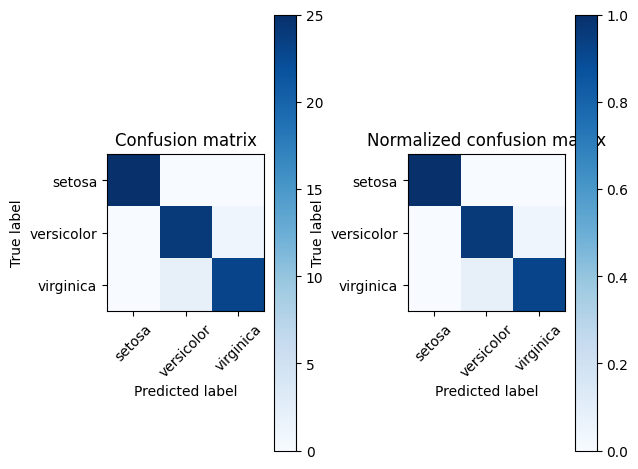

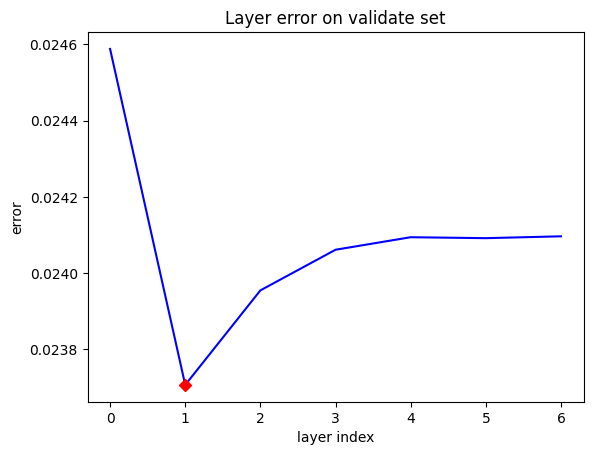

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [6]:
fig = plt.figure()
# Compute confusion matrix
cm = confusion_matrix(test_y, pred_y)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
ax1 = fig.add_subplot(121)
plot_confusion_matrix(cm)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
ax2 = fig.add_subplot(122)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
model.plot_layer_error()
plt.show()
PlotModel(model, filename='iris_model', plot_neuron_name=True, view=True).plot()